<a href="https://colab.research.google.com/github/HaniaRangel/SIM_MAT/blob/main/Examen2_RangelHania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen Módulo 2 - Montecarlo.  
### *Hania Alexa Rangel Aguilar*

**Mantenga la calma y lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen2_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen2_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`+`B`) o (`Esc`+`A`).
- Recuerde que, sobre todo, se está evaluando su capacidad de interpretar los resultados. Escriba sus **interpretaciones/conclusiones** en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.

---
### Simulación Montecarlo usando Caminata aleatoria<font size='1'>(5.1 puntos)</font>

Se desea conocer el estado final de un proceso hipotético definido como una Máquina de estados. Este proceso cuenta con los estados: **A**, **B** y **C**. El proceso se define de la siguiente manera:
* Estando en el estado **A**, 3 de cada 5 operaciones cambia al estado **B**, el resto de casos se mantiene en el estado **A**.
* Estando en el estado **B**, 2 de cada 3 operaciones cambia al estado **A**, el resto de casos cambia al estado **C**.
* Estando en el estado **C**, 4 de cada 5 operaciones cambia al estado **A**, el resto de casos cambia al estado **B**.

Respresentado por el siguiente diagrama

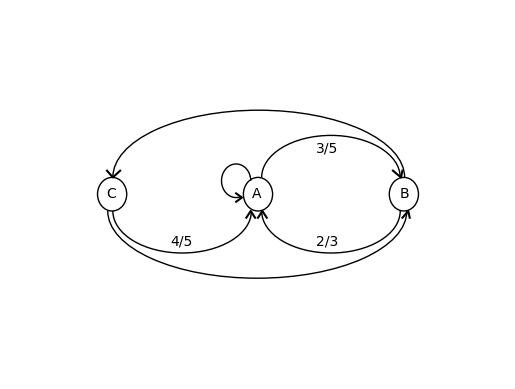

In [ ]:
# @markdown
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

A = patches.Circle((0, 0), 0.1,fc='None',color='k')
B = patches.Circle((1, 0), 0.1,fc='None',color='k')
C = patches.Circle((-1,0), 0.1,fc='None',color='k')
AB = patches.Arc((0.5,   0.1 ), 0.95, 0.5,theta2=180,fc='None',color='k')
BA = patches.Arc((0.5,   -0.1), 0.95, 0.5,theta1=180,fc='None',color='k')
BC = patches.Arc((0.005, 0.1), 2.0, 0.8,theta2=180,fc='None',color='k')
CB = patches.Arc((-0.005, -0.1), 2.05, 0.8,theta1=180,fc='None',color='k')
CA = patches.Arc((-0.52, -0.1), 0.95, 0.5,theta1=180,fc='None',color='k')
AA = patches.Arc((-0.15, 0.08), 0.2,  0.2,theta2=290,fc='None',color='k')
ax = plt.gca()
ax.add_artist(A)
ax.add_artist(B)
ax.add_artist(C)
ax.add_artist(AB)
ax.add_artist(BA)
ax.add_artist(BC)
ax.add_artist(CB)
ax.add_artist(CA)
ax.add_artist(AA)

plt.plot([0.925,0.98,0.99],[0.14,0.1,0.14],'k')    # AB
plt.plot([0.06,0.03,0],[-0.14,-0.1,-0.14],'k')       # BA
plt.plot([-0.945,-0.995,-1.035],[0.14,0.1,0.14],'k') # BC
plt.plot([-0.02,-0.05,-0.08],[-0.14,-0.1,-0.14],'k') # CA
plt.plot([-0.15,-0.11,-0.15],[0.005,-0.02,-0.045],'k') # AA
plt.plot([0.99,1.03,1.04],[-0.14,-0.1,-0.14],'k') # CB

plt.text(-0.04,-0.02,'A')
plt.text(0.97,-0.02,'B')
plt.text(-1.04,-0.02,'C')
plt.text(0.4,0.25,'3/5')  # AB
plt.text(0.4,-0.3,'2/3') # BA
plt.text(-0.6,-0.3,'4/5') # CA

plt.axis([-1.7,1.7,-1.1,1.1])
plt.axis('off')
plt.show()

1. Usando caminata aleatoria, defina una función que permita simular el proceso antes descrito. <font size='1'>(2.6 puntos)</font>

Considerando los siguientes valores para cada estado:
$$
A=0\\
B=1\\
C=2\\
$$
Le asignamos una probabilidad y una suma a cada transición:  
|Estado inicial|Estado final|Probabilidad|Transición|
|-|-|-|-|
|A|A|2/5|0|
|A|B|3/5|+1|
|A|C|0|+2|
|B|A|2/3|-1|
|B|B|0|0|
|B|C|1/3|+1|
|C|A|4/5|-2|
|C|B|1/5|-1|
|C|C|0|0|

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def maquina(estado0,operaciones):
  t=[-2,-1,0,1,2]
  estado=estado0
  for i in range(operaciones):
    if estado==0:
      p=[0,0,2/5,3/5,0]
    elif estado==1:
      p=[0,2/3,0,1/3,0]
    else:
      p=[4/5,1/5,0,0,0]
    estado+=np.random.choice(t,p=p)
  return estado

2. Si el proceso parte del estado **B**, y se ejecutan 300 operaciones. Calcule la probabilidad de que el proceso finalice donde empezó usando el método Montecarlo con 10000 escenarios. <font size='1'>(2.5 puntos)</font>

In [ ]:
B=0
for i in range(10000):
  B+=maquina(1,300)==1 # escenarios iniciando y terminando en B con 300 operaciones
B/10000

np.float64(0.343)

Hay un $34\%$ de probabilidad de que el proceso termine en el estado B habiendo empezado en ese mismo estado (con 300 operaciones)

---
### Probabilidad Precio-Umbral <font size='1'>(5.1 puntos)</font>

Suponga que desea invertir en **Tesla** o **Amazon**. Evalúe la probabilidad de obtener un retorno del 15% para Navidad desde el 12 de noviembre del presente año.

1. Obtenga los precios de cierre desde *YAHOO finance* de Tesla y Amazon desde el 11 de noviembre de 2020 al 11 de noviembre de 2025. <font size='1'>(0.8 puntos)</font>

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

/tmp/ipython-input-1534441442.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(tickers,start='2020-11-11',end='2025-11-11')['Close']
[*********************100%***********************]  2 of 2 completed


<Axes: xlabel='Date'>

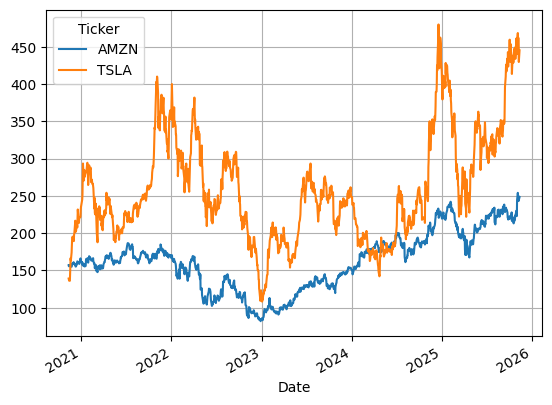

In [2]:
# TSLA -> Tesla
# AMZN -> Amazon
tickers=['TSLA','AMZN']
data=yf.download(tickers,start='2020-11-11',end='2025-11-11')['Close']
data.plot(grid=True)

2. Calcule el rendimiento simple para ambas empresas.  <font size='1'>(0.5 puntos)</font>

<Axes: xlabel='Date'>

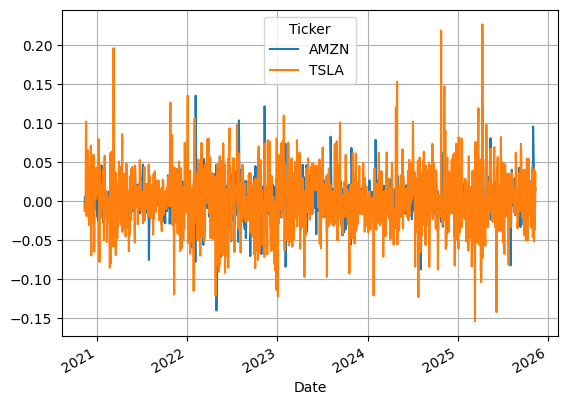

In [3]:
#Rendimientos diarios
delta=data.pct_change().dropna()
delta.plot(grid=True)

array([[<Axes: title={'center': 'AMZN'}>,
        <Axes: title={'center': 'TSLA'}>]], dtype=object)

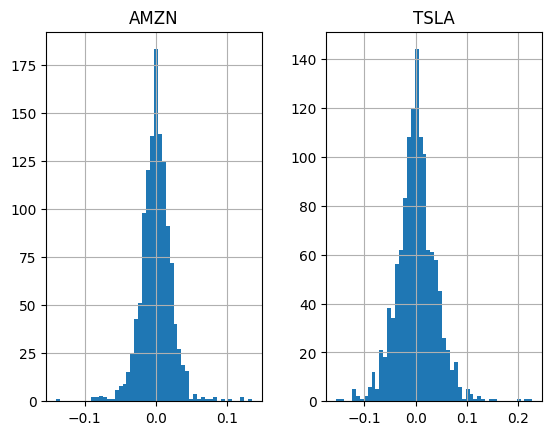

In [4]:
#Histograma de rendimientos diarios
delta.hist(bins=50,grid=True)

4. Calcule la media y desviación estandar de los rendimientos y simule 10000 escenarios de rendimientos del 12 de noviembre al 25 de diciembre de 2025.  <font size='1'>(1.6 puntos)</font>

In [13]:
media_t=delta['TSLA'].mean()
std_t=delta['TSLA'].std()
media_a=delta['AMZN'].mean()
std_a=delta['AMZN'].std()
media_t,std_t,media_a,std_a

(np.float64(0.0016699422668417971),
 0.03865608861730573,
 np.float64(0.0006094908265333825),
 0.0220593228413655)

Para TESLA:  
+ Media $0.00167$
+ Desviación estandar $0.03866$  

Para Amazon:  
+ Media $0.00065$
+ Desviación estandar $0.02206$  

In [14]:
def simulacion(delta,marca,N_dias,N_escenarios):
  #N_dias=44 -> [12/11, 25/12]
  #N_escenarios=10000
  delta_marca=np.random.normal(delta[marca].mean(),delta[marca].std(),(N_dias,N_escenarios))
  rango_tiempo=pd.date_range('2025-11-12',periods=N_dias)
  delta_marca=pd.DataFrame(delta_marca,index=rango_tiempo)
  return delta_marca

In [18]:
simulacion(delta,'TSLA',44,10000)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2025-11-12,0.025936,0.070197,0.071813,-0.037530,0.010929,0.007904,0.014132,0.010010,-0.092654,-0.001933,...,0.050257,0.054953,0.019345,-0.016710,0.008383,0.019758,0.009555,0.030401,0.045701,-0.045441
2025-11-13,-0.028050,-0.056808,0.022228,0.045507,-0.015613,0.013064,0.008734,-0.016667,0.023802,-0.082892,...,-0.003719,-0.010504,0.008379,-0.003642,-0.086062,-0.068581,0.010668,0.043414,-0.040873,0.040601
2025-11-14,0.000710,0.023837,0.015856,-0.092179,-0.043557,-0.024319,-0.035302,-0.014588,-0.001307,0.057778,...,-0.003557,0.008488,0.003922,-0.014572,-0.058748,0.021941,0.018294,-0.036813,0.028365,0.004663
2025-11-15,-0.013910,0.029898,-0.064233,0.009851,-0.019650,-0.056570,0.043224,-0.028004,-0.063893,-0.030252,...,-0.037040,-0.009814,0.018284,0.041723,0.020408,-0.038891,-0.055963,-0.046893,0.001531,-0.037666
2025-11-16,-0.068851,-0.020447,-0.018734,0.072503,0.015602,0.017469,-0.013492,-0.027483,0.019167,-0.029181,...,0.069195,-0.042663,0.051773,-0.033258,-0.098942,0.024767,0.023091,0.038741,0.006151,0.045234
2025-11-17,-0.006344,-0.025179,0.033283,0.084118,-0.019418,-0.060534,-0.011016,-0.025743,-0.002090,0.009332,...,-0.050656,-0.003616,0.019349,0.003043,-0.025386,-0.014144,-0.019457,-0.001095,0.017793,-0.005211
2025-11-18,0.032469,-0.006718,-0.014870,0.064204,0.006935,-0.032697,-0.025423,0.035983,-0.014237,-0.013515,...,-0.008687,0.023066,-0.025019,-0.012303,0.001947,0.063643,-0.011354,-0.018372,-0.028727,-0.040468
2025-11-19,-0.034671,0.003645,0.002839,-0.050969,-0.024696,0.034372,-0.032461,0.024196,-0.046513,-0.036071,...,0.025246,0.024550,0.088350,-0.080670,0.035850,-0.001580,-0.000738,0.043563,-0.049794,-0.021438
2025-11-20,0.021668,0.021438,0.010793,-0.058287,0.000616,0.038934,-0.019559,-0.050413,0.002456,-0.006792,...,-0.052950,-0.012256,0.012839,-0.012073,-0.060779,-0.093032,-0.068062,0.025106,-0.050615,-0.044583
2025-11-21,0.038315,-0.059284,0.005998,0.079197,0.060565,-0.020881,-0.034354,-0.068035,-0.073221,0.001675,...,-0.003463,-0.005484,0.004714,-0.028979,0.026945,0.077932,0.024901,0.013751,0.037794,-0.044846


In [19]:
simulacion(delta,'AMZN',44,10000)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2025-11-12,0.032850,-0.015130,-0.009433,-0.015486,0.036625,0.021200,0.027102,0.006612,0.001585,-0.024544,...,-0.001994,-0.010689,0.027217,0.009243,0.007866,-0.007204,0.018867,0.016823,0.004791,-0.047956
2025-11-13,-0.029116,0.040425,-0.004950,-0.003586,0.018344,-0.020413,0.025745,0.042519,0.040772,-0.007424,...,-0.011637,0.003930,0.008429,0.010779,0.022063,0.007087,-0.001016,0.032630,0.009620,0.015302
2025-11-14,0.001316,-0.036807,0.023452,-0.035574,0.021916,0.047948,0.006716,-0.023290,-0.000675,0.011983,...,-0.028486,-0.012682,-0.009921,-0.032950,-0.013830,0.031027,-0.001592,0.010458,0.018329,0.048241
2025-11-15,0.010902,-0.033904,0.000753,-0.013181,-0.004838,-0.021345,0.019464,0.010255,0.003406,0.010506,...,-0.021220,-0.035704,-0.017976,0.006814,0.015781,0.001550,-0.031360,0.012306,-0.026352,-0.003410
2025-11-16,0.003011,-0.006457,-0.033985,-0.008379,0.022897,0.008900,0.023520,0.031669,-0.010536,0.008042,...,0.009881,0.000113,-0.029877,0.011935,0.013539,-0.033504,-0.021201,-0.004694,0.005944,0.002574
2025-11-17,-0.022780,0.023267,-0.010085,0.021504,0.041891,-0.003334,0.020636,-0.003517,-0.051849,0.027157,...,0.018337,0.001315,-0.020598,0.001974,-0.026810,-0.023429,-0.008179,-0.037360,0.029261,0.019983
2025-11-18,0.022142,-0.011795,-0.021780,0.033598,-0.021745,-0.019149,-0.030300,0.011192,-0.041484,0.013389,...,0.022217,-0.000663,0.014202,-0.031214,0.012444,0.023119,0.016470,-0.002690,0.032284,0.000823
2025-11-19,-0.006970,0.011530,0.009443,-0.003947,-0.051767,-0.027973,0.011099,0.026957,0.024644,-0.008823,...,-0.027136,-0.034330,-0.032908,0.001825,0.018696,-0.045854,0.002201,-0.019881,0.023857,-0.018589
2025-11-20,-0.017256,0.011377,-0.012001,0.048256,-0.005512,0.013449,-0.013692,-0.002531,0.034275,0.030735,...,-0.017026,0.009468,-0.047660,0.005888,0.002710,-0.001831,0.036306,0.028100,-0.023852,-0.010012
2025-11-21,-0.011093,-0.035344,-0.018772,0.025724,-0.010787,-0.000983,0.036132,-0.007820,0.000464,0.004114,...,0.002085,0.007501,-0.006786,-0.004097,-0.061309,-0.000180,0.018833,0.010040,0.003001,0.014777


5. Use los datos de simulación para obtener los precios proyectados al cierre para ambas empresas.  <font size='1'>(1 punto)</font>

In [16]:
def precios(delta,marca,N_dias,N_escenarios):
  delta_marca=simulacion(delta,marca,N_dias,N_escenarios)
  precios_marca=data[marca].iloc[-1]*(delta_marca+1).cumprod()
  return precios_marca

In [20]:
precios(delta,'TSLA',44,10000)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2025-11-12,439.744833,419.374358,453.427795,434.750678,441.591012,430.566374,466.369793,436.674596,439.065528,454.933810,...,429.322100,435.973963,446.834792,422.114143,424.884603,453.298897,434.529393,445.541713,460.759068,469.997794
2025-11-13,425.360321,406.952674,431.096896,445.476540,470.444772,429.956405,495.199386,426.050907,470.885390,447.700700,...,433.671413,447.106679,459.619967,428.803621,424.814043,463.889963,426.886197,445.361548,463.193688,486.435347
2025-11-14,453.724332,417.727937,424.846929,467.704251,504.529951,411.677185,501.963447,418.551443,504.558283,423.717611,...,438.166869,444.651970,451.787936,408.306530,403.252681,448.731760,400.956932,464.305371,471.818476,491.888993
2025-11-15,445.149035,406.094344,428.283483,454.324500,507.954782,427.866114,514.737774,436.048800,520.245234,423.768878,...,423.325286,444.182616,436.851371,426.964120,405.668851,455.868084,409.024686,466.802837,482.705327,471.034595
2025-11-16,467.672100,399.740610,415.392337,423.359256,508.240714,417.317572,523.049179,425.072668,497.411166,406.711276,...,409.088179,431.855327,412.108835,413.817579,423.953625,473.527976,395.611729,491.855653,465.668227,461.028841
2025-11-17,441.626603,394.311451,419.766720,421.116975,533.653387,390.368439,515.304076,430.621213,495.183375,395.923029,...,415.650022,416.204255,399.438189,418.515931,399.636313,461.019746,391.518243,476.623769,458.786467,443.175449
2025-11-18,422.701068,387.801226,402.595824,417.862598,571.737052,424.203689,517.409225,433.265112,501.152946,414.312544,...,426.302799,426.823379,409.171214,429.262525,381.506913,445.229582,351.548557,471.645299,489.034442,432.552390
2025-11-19,423.434473,374.392849,425.625136,415.923780,567.898987,404.489645,537.705211,457.809162,528.112045,415.964303,...,434.893790,426.406254,438.409216,427.019203,387.330837,430.049533,370.509282,451.795082,502.884176,422.119993
2025-11-20,451.538140,392.660261,426.185988,446.970267,602.367695,394.469816,532.961989,424.414276,530.085347,403.798482,...,424.106361,439.475047,429.395076,419.735362,389.848141,428.057076,390.428444,444.615938,518.929865,406.654966
2025-11-21,475.096441,398.255428,425.997250,431.253418,573.852591,387.524163,535.662659,407.963774,493.851588,395.173087,...,439.665601,420.860229,439.476948,417.465138,407.617521,454.614177,395.514371,442.102785,517.764999,439.447860


In [21]:
precios(delta,'AMZN',44,10000)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2025-11-12,255.029471,248.627173,247.109169,253.945510,251.162945,254.095257,251.744903,247.869437,249.659763,237.710484,...,250.194920,246.116164,258.540832,250.833062,244.069410,252.498346,256.596767,250.384737,243.069407,250.456274
2025-11-13,257.028526,236.774946,248.992206,258.844182,253.475878,253.820228,252.186897,239.656712,250.388348,246.425426,...,252.398477,251.069312,263.534400,246.648235,241.333474,251.558031,257.003556,241.923358,245.523834,256.888305
2025-11-14,259.581271,236.600759,257.181779,256.468849,246.651404,253.312012,253.180658,233.842635,242.452123,241.338083,...,250.116499,257.529662,258.452035,246.339625,237.583467,249.286769,248.345935,242.442106,242.069792,249.695985
2025-11-15,260.170396,240.187487,259.349806,255.171172,242.144506,243.952722,254.639682,235.990886,245.372301,243.222239,...,238.250068,244.856290,253.511779,253.091003,245.669778,259.431513,252.374812,238.582000,251.108448,241.688621
2025-11-16,263.481521,237.477505,248.994955,257.230098,225.406206,244.401721,269.992158,230.896771,242.350258,247.229875,...,234.532090,246.933816,260.054153,245.576936,246.302636,255.929553,257.921055,248.008944,242.295799,234.393485
2025-11-17,257.539242,229.540649,254.632279,250.386709,221.652149,236.840568,280.333868,226.079071,242.357393,256.598036,...,228.289046,252.608287,259.349178,246.470471,248.788745,261.259977,256.260828,245.300336,245.128962,239.682921
2025-11-18,257.388742,226.240221,256.931146,258.589422,214.061618,229.661528,279.509520,222.979333,246.144792,261.814719,...,239.442058,249.285175,268.511317,252.334240,241.604002,263.824214,258.200750,246.471920,241.325060,233.248914
2025-11-19,261.609030,233.007168,261.702866,253.078526,219.326290,230.485109,274.902395,223.921315,238.781292,252.148504,...,236.016113,246.421763,261.644478,249.263450,235.523234,258.873580,252.479719,239.622692,239.182499,231.571692
2025-11-20,266.681851,229.898813,250.751211,256.534804,222.562005,240.112267,280.333799,226.845996,238.259223,235.569237,...,239.655618,239.353451,255.013649,250.288701,238.461768,256.943755,256.519359,244.797299,234.443860,226.791921
2025-11-21,275.506980,234.537296,247.307177,250.212522,222.894757,247.960146,278.504746,224.996083,251.142209,240.702648,...,233.125381,234.368541,251.938033,255.059721,235.147506,260.269565,262.547586,248.184754,237.173861,226.217389


6. En un gráfico muestre la evolución de ambas probabilidades de obtener un retorno del 15% a partir de la fecha indicada. ¿Cuál genera mayores espectativas?  <font size='1'>(1.2 puntos)</font>

In [25]:
def ProbPorc(delta,marca,N_dias,N_escenarios,porc):
  precios_marca=precios(delta,marca,N_dias,N_escenarios)
  # Variable de Bernoulli (Cuántos escenarios satisfacen la condición buscada)
  B_marca=precios_marca>data[marca].iloc[-1]*(1+porc/100)
  proba_marca=B_marca.mean(axis=1)
  return proba_marca

/tmp/ipython-input-159145112.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prob_t[-1]


np.float64(0.3556)

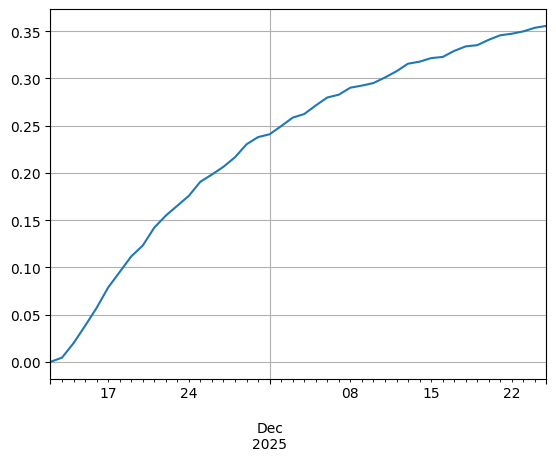

In [28]:
prob_t=ProbPorc(delta,'TSLA',44,10000,15)
prob_t.plot(grid=True)
prob_t[-1]

/tmp/ipython-input-1389644715.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prob_a[-1]


np.float64(0.2029)

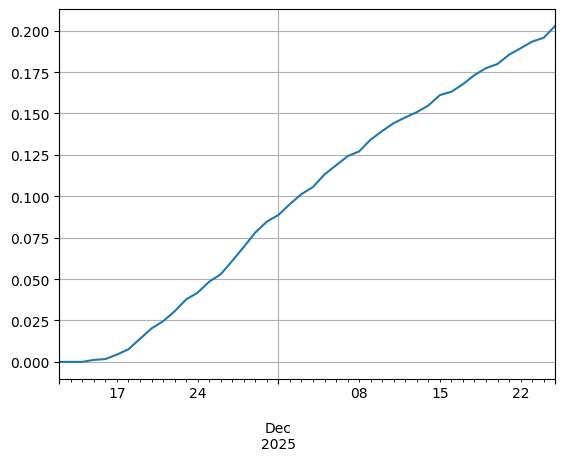

In [29]:
prob_a=ProbPorc(delta,'AMZN',44,10000,15)
prob_a.plot(grid=True)
prob_a[-1]

Con Tesla hay un $35.56\%$ de obtener un retorno del $15\%$ para navidad, lo cual es mayor que con Amazon ($20.29\%$)